# Tuning of Genetic Evaluators

Loading data for sigmoid center tuning

In [10]:
from data_processing_functions import *
from time import time
validation_measures = ["cost","precision","recall","f1","accuracy"]
corr_measure = "cost"
tuning_measure_prefix = "Sigmoid growth rate"
names= ["GEIC","GEICS","GESC"]
csv_path_GEIC = "/home/jens/masterData/AlgorithmTuner/RANDGEIC/grTest/2021-25-02-13-42-43-data.csv"
csv_path_GEICS = "/home/jens/masterData/AlgorithmTuner/RANDGEICS/grTest/2021-25-02-13-44-39-data.csv"
csv_path_GESC = "/home/jens/masterData/AlgorithmTuner/RANDGESC/grTest/2021-25-02-13-46-39-data.csv"
paths = [csv_path_GEIC,csv_path_GEICS,csv_path_GESC]

## GEIC Correlation between cost and f1/precision as a function between Sigmoid Center


In [12]:
dfs = []
corr_dfs = []
tuning_measures=[]

for name,path in zip(names,paths):
    tuning_measures.append(tuning_measure:=name+"/"+tuning_measure_prefix)
    dfs.append(pd.read_csv(path, usecols = ["algName","objName","geName",tuning_measure]+validation_measures, dtype = {"algName":"category","objName":"category","geName":"category"}))
    corr_dfs.append(dfs[-1].groupby(["geName","objName",tuning_measure]).corrwith(dfs[-1][corr_measure]).reset_index())
    corr_dfs[-1].rename(columns={tuning_measure:tuning_measure_prefix},inplace=True)


In [14]:
corr_df = pd.concat(corr_dfs).reset_index()
corr_df

,geName,objName,Sigmoid growth rate,precision,recall,accuracy,f1,cost
0,GEIC,AngleTubes,1,-0.112668,-0.251560,-0.169313,-0.173603,1.0
1,GEIC,AngleTubes,2,-0.128010,-0.235673,-0.167591,-0.172839,1.0
2,GEIC,AngleTubes,3,-0.123673,-0.207835,-0.151579,-0.158945,1.0
3,GEIC,AngleTubes,4,-0.154004,-0.241084,-0.174124,-0.197906,1.0
4,GEIC,AngleTubes,5,-0.142530,-0.217919,-0.163152,-0.181263,1.0
...,...,...,...,...,...,...,...,...
35,GESC,Gameboys,6,-0.315166,-0.427672,-0.203615,-0.391844,1.0
36,GESC,Gameboys,7,-0.306379,-0.428959,-0.199654,-0.392888,1.0
37,GESC,Gameboys,8,-0.306407,-0.417479,-0.187368,-0.384826,1.0
38,GESC,Gameboys,9,-0.301581,-0.424939,-0.187859,-0.384298,1.0


### F1 correlation

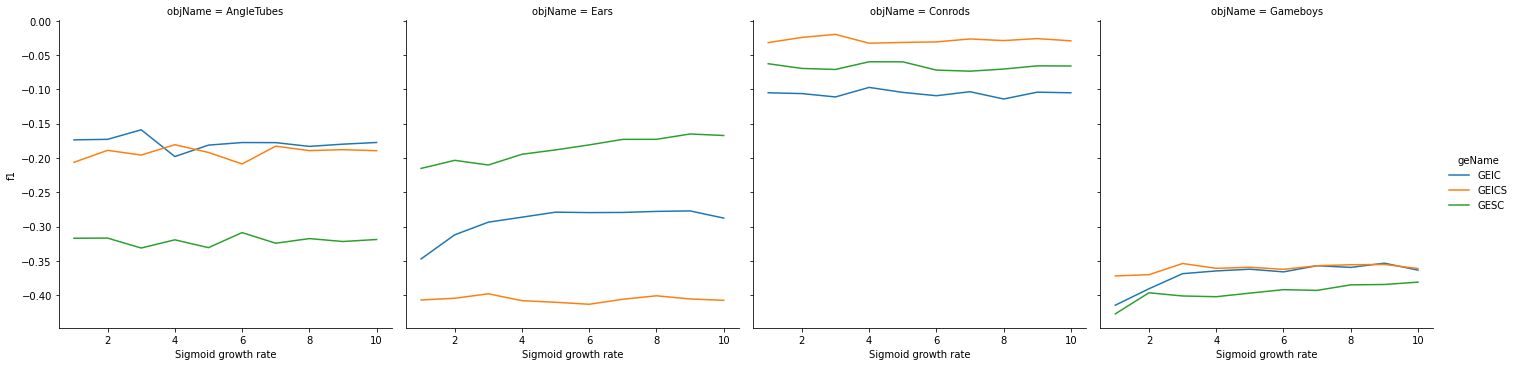

In [16]:
cost_corr_plot = sns.relplot(x=tuning_measure_prefix,y="f1",col="objName",hue="geName",data=corr_df,kind="line",facet_kws={'sharey': True, 'sharex': True}) 

## Precision correlation

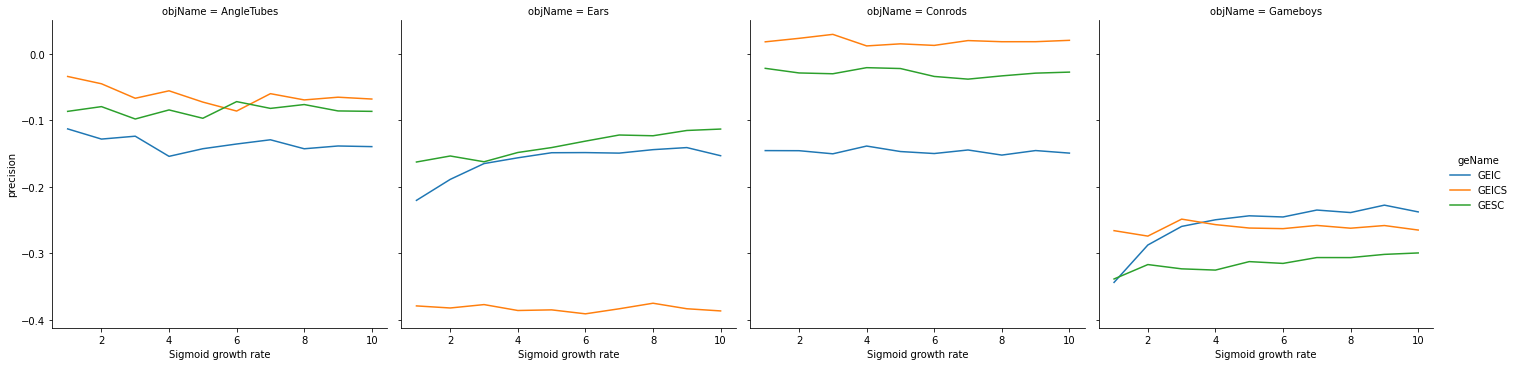

In [18]:
cost_corr_plot = sns.relplot(x=tuning_measure_prefix,y="precision",col="objName",hue="geName",data=corr_df,kind="line",facet_kws={'sharey': True, 'sharex': True}) 

In [19]:
print("Best Params for Correlation between cost and f1")
best_param_f1, best_idx_f1 = get_best_cost_corr_parameters(corr_df,"f1",tuning_measure_prefix)
print_best_cost_corr_parameters(best_param_f1,tuning_measure_prefix)

print("\nBest Params for Correlation between cost and pecision")
best_param_precision, best_idx_precision = get_best_cost_corr_parameters(corr_df,"precision",tuning_measure_prefix)
print_best_cost_corr_parameters(best_param_precision,tuning_measure_prefix)

Best Params for Correlation between cost and f1
AngleTubes,GEIC,Sigmoid growth rate,4
AngleTubes,GEICS,Sigmoid growth rate,4
AngleTubes,GESC,Sigmoid growth rate,4
Ears,GEIC,Sigmoid growth rate,1
Ears,GEICS,Sigmoid growth rate,1
Ears,GESC,Sigmoid growth rate,1
Conrods,GEIC,Sigmoid growth rate,8
Conrods,GEICS,Sigmoid growth rate,8
Conrods,GESC,Sigmoid growth rate,8
Gameboys,GEIC,Sigmoid growth rate,1
Gameboys,GEICS,Sigmoid growth rate,1
Gameboys,GESC,Sigmoid growth rate,1
AngleTubes,GEIC,Sigmoid growth rate,6
AngleTubes,GEICS,Sigmoid growth rate,6
AngleTubes,GESC,Sigmoid growth rate,6
Ears,GEIC,Sigmoid growth rate,6
Ears,GEICS,Sigmoid growth rate,6
Ears,GESC,Sigmoid growth rate,6
Conrods,GEIC,Sigmoid growth rate,4
Conrods,GEICS,Sigmoid growth rate,4
Conrods,GESC,Sigmoid growth rate,4
Gameboys,GEIC,Sigmoid growth rate,1
Gameboys,GEICS,Sigmoid growth rate,1
Gameboys,GESC,Sigmoid growth rate,1
AngleTubes,GEIC,Sigmoid growth rate,3
AngleTubes,GEICS,Sigmoid growth rate,3
AngleTubes,GESC,Sigmo